In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout 
import matplotlib.pyplot as plt

In [2]:
fifa = pd.read_csv('./players_22.csv')

C:\Users\herna\AppData\Local\Temp\ipykernel_11908\2231276672.py:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa = pd.read_csv('./players_22.csv')


In [3]:
columnas_a_eliminar = ["player_face_url", "club_logo_url", "club_flag_url", "nation_logo_url","pace","mentality_aggression","mentality_composure","mentality_vision","mentality_penalties","mentality_positioning","mentality_interceptions", "player_positions","weight_kg","height_cm","nation_flag_url", "league_level","sofifa_id","body_type", "player_url", "short_name", "dob", "real_face", "club_jersey_number", "nation_jersey_number", "preferred_foot","weak_foot","club_loaned_from", "club_joined", "long_name", "league_name", "club_team_id", "club_name", "club_position", "nation_team_id", "nation_position", "nationality_id", "nationality_name", "club_contract_valid_until", "player_tags", "player_traits", "work_rate", 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram',
    'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb',
    'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy',
    'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve',
    'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration',
    'movement_sprint_speed', 'movement_agility', 'movement_balance',
    'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
    'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
    'goalkeeping_reflexes', 'goalkeeping_speed',"age","skill_moves","physic","shooting","defending","passing","dribbling","movement_reactions"]
fifa_limpio = fifa.drop(columnas_a_eliminar, axis=1)

In [4]:
fifa_limpio_no_null = fifa_limpio.dropna()

missing_values_after_drop = fifa_limpio_no_null.isnull().sum()
print(missing_values_after_drop[missing_values_after_drop > 0])

Series([], dtype: int64)


In [5]:
fifa_limpio_no_null

,overall,potential,value_eur,wage_eur,international_reputation,release_clause_eur
0,93,93,78000000.0,320000.0,5,144300000.0
1,92,92,119500000.0,270000.0,5,197200000.0
2,91,91,45000000.0,270000.0,5,83300000.0
3,91,91,129000000.0,270000.0,5,238700000.0
4,91,91,125500000.0,350000.0,4,232200000.0
...,...,...,...,...,...,...
19234,47,52,70000.0,1000.0,1,114000.0
19235,47,59,110000.0,500.0,1,193000.0
19236,47,55,100000.0,500.0,1,175000.0
19237,47,60,110000.0,500.0,1,239000.0


In [6]:
num_features = fifa_limpio_no_null.shape[1] - 1  

print("Número de características (features):", num_features)

Número de características (features): 5


In [7]:
X = fifa_limpio_no_null.drop('value_eur', axis=1)
y = fifa_limpio_no_null['value_eur']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(num_features,)))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

In [10]:
history = model.fit(X_train_scaled, y_train, epochs=75, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/75


452/452 [==============================] - 6s 7ms/step - loss: 33385300885504.0000 - mae: 1827420.6250 - val_loss: 5823126831104.0000 - val_mae: 1045587.1875
Epoch 2/75
452/452 [==============================] - 3s 6ms/step - loss: 4605218914304.0000 - mae: 866469.8125 - val_loss: 2970569932800.0000 - val_mae: 681109.9375
Epoch 3/75
452/452 [==============================] - 2s 5ms/step - loss: 1934538571776.0000 - mae: 532220.2500 - val_loss: 994259369984.0000 - val_mae: 414260.2188
Epoch 4/75
452/452 [==============================] - 3s 6ms/step - loss: 1393852284928.0000 - mae: 445687.0312 - val_loss: 750760099840.0000 - val_mae: 405359.1875
Epoch 5/75
452/452 [==============================] - 3s 7ms/step - loss: 1115761672192.0000 - mae: 415157.7188 - val_loss: 719722708992.0000 - val_mae: 345094.8438
Epoch 6/75
452/452 [==============================] - 3s 7ms/step - loss: 1021902323712.0000 - mae: 391106.6250 - val_loss: 589384056832.0000 - val_mae: 328016.7188
Epo

In [11]:
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Loss: {loss}, MAE: {mae}')

113/113 [==============================] - 0s 3ms/step - loss: 393685565440.0000 - mae: 220378.9531
Loss: 393685565440.0, MAE: 220378.953125


In [12]:
predictions = model.predict(X_test_scaled)

ultimas_cinco_predicciones = predictions[-10:]
valores_reales = y_test[-10:]

for i in range(len(ultimas_cinco_predicciones)):
    print(f"Predicción: {ultimas_cinco_predicciones[i]}, Valor real: {valores_reales.iloc[i]}")

113/113 [==============================] - 1s 3ms/step
Predicción: [1171605.], Valor real: 1300000.0
Predicción: [326594.12], Valor real: 325000.0
Predicción: [678925.5], Valor real: 750000.0
Predicción: [1379098.2], Valor real: 1300000.0
Predicción: [1875576.6], Valor real: 1800000.0
Predicción: [449312.3], Valor real: 450000.0
Predicción: [1245533.4], Valor real: 1300000.0
Predicción: [9969118.], Valor real: 9500000.0
Predicción: [4388105.], Valor real: 4000000.0
Predicción: [208830.44], Valor real: 210000.0


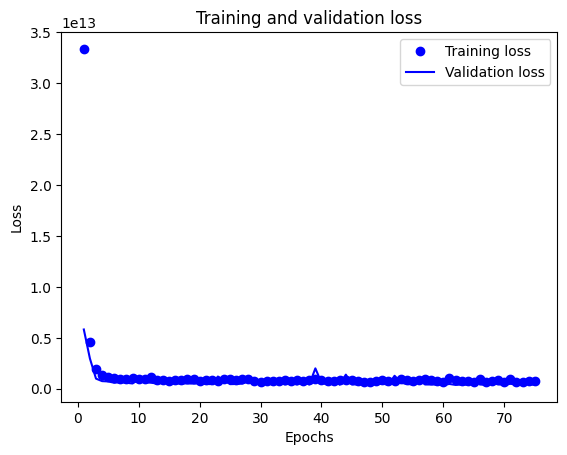

In [13]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
